In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/maxwell.arff.csv")


In [3]:
dataset.head()

,SizeFP,Nlan,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,Effort
0,647,3,4,3,5,3,3,3,4,5,4,5,4,4,4,4,5,7871
1,130,3,2,3,3,3,3,3,2,2,4,3,4,4,4,4,4,845
2,254,2,3,3,2,3,3,4,2,3,4,5,4,3,2,3,3,2330
3,1056,3,2,2,4,2,2,1,3,5,4,4,5,4,3,2,3,21272
4,383,2,3,3,3,4,3,3,4,3,4,4,3,4,5,4,4,4224


In [4]:




max_corr_features =['SizeFP','Nlan','T01','T07','T08','T09','T10','T11','T15']

x = np.array(dataset[max_corr_features])
y = np.array(dataset['Effort'])

In [5]:
y.shape

(62,)

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(62,1))
y=scaler.fit_transform(y)

In [7]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [8]:

import lightgbm as lgb

regr = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5)
regr.fit(X_train,y_train)

y_pred=regr.predict(X_test)

c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
y.shape

(62, 1)

In [10]:
y_pred=np.reshape(y_pred,(13,1))
y_test=np.reshape(y_test,(13,1))

In [11]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:
y_pred

array([[ 0.14031617],
       [ 0.11101759],
       [ 0.220359  ],
       [ 0.10193837],
       [ 0.14079097],
       [-0.00146175],
       [ 0.220359  ],
       [ 0.06603946],
       [ 0.220359  ],
       [ 0.11695888],
       [ 0.11101759],
       [ 0.07189969],
       [ 0.14840821]])

In [13]:
y_test

array([[0.06136807],
       [0.20784015],
       [0.11547908],
       [0.10334173],
       [0.03554056],
       [0.01857046],
       [0.40130881],
       [0.        ],
       [1.        ],
       [0.06396666],
       [0.03761626],
       [0.05889623],
       [0.16542283]])

In [14]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [15]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.05320667444747862

RMSE:
 0.23066572013950973

MAPE:
 inf

SMAPE:
 84.33

 Adj R2 score:
 0.23080932336824977


C:\Users\sachi\AppData\Local\Temp\ipykernel_11828\4261787059.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


In [16]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [17]:
y_test=np.reshape(y_test,(13,))
y_pred=np.reshape(y_pred,(13,))

In [18]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0          4456.0       9438.493657
1         13700.0       7589.431256
2          7871.0      14490.076775
3          7105.0       7016.432476
4          2826.0       9468.458788
5          1755.0        490.747688
6         25910.0      14490.076775
7           583.0       4750.816126
8         63694.0      14490.076775
9          4620.0       7964.391987
10         2957.0       7589.431256
11         4300.0       5120.661314
12        11023.0       9949.190567


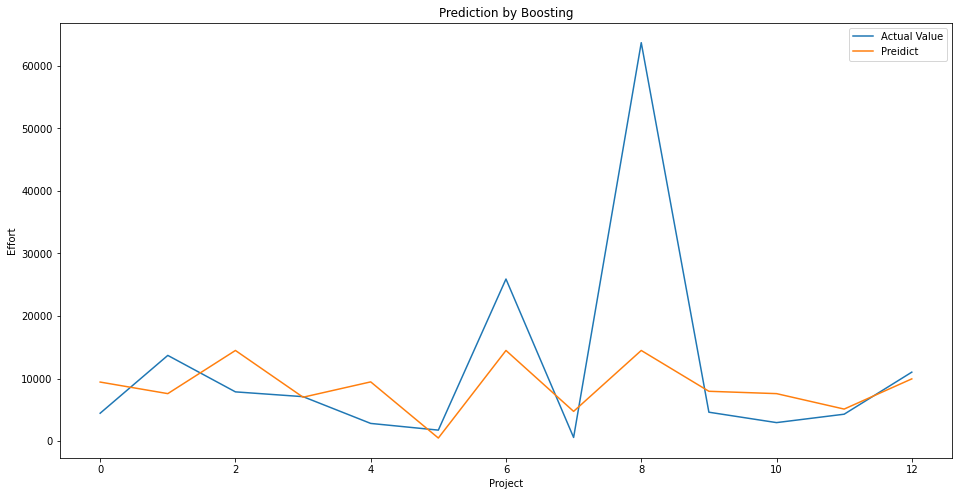

In [19]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Boosting")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()